# LGBIO2060: Project 1
---
**Modelling of biological systems**

👥 Authors: Gabriel de Morais and Gabriela Ishikawa



## Q1)  🔮 Explore the data


Before adressing the questions, it's essential to understand the variables within the dataset. Therefore, the initial cells present an exploratory analysis of eight specific variables.

In [ ]:
import pickle

# Loading the data set 
with open('data.pkl', 'rb') as file_pkl:
    my_data = pickle.load(file_pkl)

As mentioned in the project instructions, the dataset is a structured as a dictionary. First, we can see that there are 10 subjects in it.

In [ ]:
subjects = my_data.keys()
subjects

And for each subject, there are trials that contains several variables describing the trial: the eight specific variables. To analyse the dataset, we chose the Trial 400 from Subject 5 as an example.

In [ ]:
# Getting the data of Subject 5 and Trial 400
trial = my_data['Subject5']['Trial400']
trial.keys()

Now let's dive into each variable to see how this data is organized.

##### Condition and Condition_Name

In [ ]:
# Condition and Condition Name
condition = trial['Condition']
condition_name = trial['Condition_Name']

print('Trial 400 of Subject 5 has the condition', condition, 'named', condition_name)

##### CursorPos

As the trial condition is **shift**, the feedback given to the subject is a point in a short time range midtime the trial.

In [ ]:
import numpy as np

# CursorPos
cursor_pos = trial['CursorPos']

# TimeStep in which feedback is given to the Subject
ind_feedback = []
for i, arr in enumerate(cursor_pos):
    if not np.isnan(arr).any():
        ind_feedback.append(i+1)

initial = ind_feedback[0] - 1
end = ind_feedback[0]
for i in range(len(ind_feedback)):
    if (ind_feedback[i] + 1 != ind_feedback[i+1]):
        end = ind_feedback[i] - 1
        break

print("From time step", initial + 1, "to", end + 1, "the feedback given to the subject is", cursor_pos[initial])
print("The data is an array, filled with nan when there is no feedback, and return the position otherwise:")
cursor_pos

##### HandPos

In [ ]:
# HandPos
hand_pos = trial['HandPos']

print("It's given the position (x, y , z) of the hand in each time step (from 1 to 200):")
hand_pos

##### LateralShift

In [ ]:
# Lateral Shift
lateral_shift = trial['LateralShift']

print("The value of the lateral shift of Trial 400 of Subject 5 is", lateral_shift, "cm")

##### TargetPos

In [ ]:
# TargetPos
target_pos = trial['TargetPos']

print("The target position is given also in a array for each time step:")
target_pos

##### Time and Timestep

In [ ]:
time = trial['Time']
time_step = trial['Timestep']

print("Time and Timestep represents the division of the time of the experiment and both are given as arrays:")
for i in time_step:
    print("In time step", i-1, "the time is", time[i-1], "s")

### A) What are the variables the experimenter control? What changes over the different trials? What variables are the results of the experiment, what is measured?

The **variables that are controlled by the experimenter** are:

1. `Condition`: The experimenter controls the type of feedback given to the subject, with options for different conditions, including: 1, Clear feedback; 2: Small Blur; 3: Large Blur; 4: Occluded

2. `LateralShift`:  The experimenter controls the lateral shift between the hand position and the feedback presented on the screen. This shift value is set by a prior distribution of the lateral shift defined by a gaussian with mean of 1 cm and a standard deviation of 0.5 cm.

3. `Target Position`: The position of the target on the screen is also controlled by the experimenter. 

**Variables that change over different trials** are: `Condition`, `CursorPos`, `HandPos` and `LateralShift`.

The results of the experiment are represented by HandPos, Time, and TimeStep, which are used to measure and analyze the subject's hand movements and the timing of the experiment. However, the most important value is the lateral error (final position - target position) at the end of the experiment. This is because it will be the value used to compare with the true lateral shift and draw conclusions about the experiment.

The answers are summarized in the following table:

|Variable name |	Description |	Controlled? | Changes over trials? |
|--------------|----------------|---------------|----------------------| 
|`Condition` |	integer informing the kind of feedback given to the subject (either 1, 2, 3 or 4) | Yes | Yes |
|`Condition_Name` |	string informing the kind of feedback given to the subject: “shift”, “small blur”, “large blur” or “occluded” | - | - |
|`CursorPos` |	list of 200 numpy arrays, one for each time step. In each array, one line gives the x,y and z coordinates of one dot of the feedback given to the subject on the screen. If the feedback is a cloud of dot, the array is size (25,3), else the array is size (3,). When the feedback is occluded, the arrays are filled with ‘nan’ | No | Yes |
|`HandPos` |	array of size (200, 3) giving the hand position (x, y, z-coordinates) at each time steps | No | Yes |
|`LateralShift` |	value in cm giving the lateral shift between the hand position and the feedback given through the screen | Yes | Yes |
|`TargetPos` |	array of size (200, 3) giving the target position (x, y, z-coordinates) at each time steps |Yes | No |
|`Time` |	array of float of size (200,) | - |	- |
|`Timestep` |	array of int of size (200,) | - | - | 

### B) Plot some relevant figures that represent the data. For example, it could be typical trials for one subject, it could a mean trajectory over the subjects, over the conditions... Justify your choice. 

The data structure as it is now is not the best for making graphs, given the number of loops that would have to be created to go through all the concatenated dictionaries. For this reason, we decided to transform the dictionary structure into dataframes as follows:
Each subject has an associated dataframe. The dataframes are organized in the `subjects` list. In each dataframe, the columns correspond to the experiment variables, while the rows represent the trials. 

In [ ]:
import pandas as pd

# Create an empty list to store the datasets for each subject
datasets = []

# Iterate through each subject
for subject_id, subject_data in my_data.items():
    subject_dataset = []

    # Iterate through each trial for the subject
    for trial_id, trial_data in subject_data.items():
        
        # Extract relevant variables
        condition = int(trial_data['Condition'])
        condition_name = trial_data['Condition_Name']
        cursor_pos = np.array(trial_data['CursorPos'])
        hand_pos = np.array(trial_data['HandPos'])
        lateral_shift = float(trial_data['LateralShift'])
        target_pos = np.array(trial_data['TargetPos'])
        time = np.array(trial_data['Time'])
        time_step = np.array(trial_data['Timestep'])

        # Append trial data as a row in the subject dataset
        subject_dataset.append([condition, condition_name, cursor_pos, hand_pos, lateral_shift, target_pos, time, time_step])

    # Convert the subject dataset to a Pandas DataFrame with specified data types
    subject_df = pd.DataFrame(subject_dataset, columns=['Condition', 'Condition_Name', 'CursorPos', 'HandPos', 'LateralShift', 'TargetPos', 'Time', 'TimeStep'])

    # Add the subject DataFrame to the list of datasets
    datasets.append(subject_df)

In [ ]:
# Print a preview of the first 5 rows of the first subject dataset
datasets[0].head()

In [ ]:
# For each element of the first row, print the data type
for element in datasets[0].iloc[0]:
    print(type(element))

#### 1. Occurences of each condition

First, let's see how the conditions are distributed considering all the subjects.

In [ ]:
# Plot the number of occurences of each condition across all subjects
import matplotlib.pyplot as plt

# Initialize a dictionary to store the counts for each condition
condition_counts = {1: 0, 2: 0, 3: 0, 4: 0}

# Iterate through each subject's dataset
for subject_dataset in datasets:
    # Count the occurrences of each condition
    condition_counts_subject = subject_dataset['Condition'].value_counts().to_dict()

    # Update the overall counts
    for condition, count in condition_counts_subject.items():
        condition_counts[condition] += count

# Convert the counts to a DataFrame for plotting
condition_df = pd.DataFrame.from_dict(condition_counts, orient='index', columns=['Count'])

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(condition_df.index, condition_df['Count'], color=['green', 'yellow', 'blue', 'white'], alpha=0.7)
plt.title('Number of Occurrences of Each Condition Across All Subjects')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(list(condition_counts.keys()))
plt.show()

In [ ]:
condition_df['Count']

#### 2. Individual Trial Trajectory


This plot presents the evolution of hand movement over time in a visual and interactive way. It is possible to select any attempt and any subject. 

In [ ]:
from ipywidgets import interact, widgets
from IPython.display import display

# Define a function to update the graph
def update_graph(time_now, dataset, row_index, subject_id):
    HandPos = dataset.iloc[row_index]['HandPos']
    TargetPos = dataset.iloc[row_index]['TargetPos']
    HandPosX = HandPos[:, 0]
    HandPosY = HandPos[:, 1]
    x = HandPosX
    y = HandPosY

    condition = dataset.iloc[row_index]['Condition']
    condition_name = dataset.iloc[row_index]['Condition_Name']
    title = f"Trial {row_index} of Subject {subject_id}: {condition_name} (Condition {condition})"

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(x, y, label='Trajectory')
    ax.scatter(TargetPos[0, 0], TargetPos[0, 1], color='green', marker='o', label='Target')
    ax.scatter(x[int(time_now * len(dataset.iloc[row_index]['Time']) / 200)],
                y[int(time_now * len(dataset.iloc[row_index]['Time']) / 200)], color='red', marker='o', label='Position')

    ax.set_title(title)
    ax.set_xlabel('X Position [cm]')
    ax.set_ylabel('Y Position [cm]')
    ax.legend()
    ax.grid(True)
    plt.show()

# Create a function to display the graph with an independent slider
def display_graph(row_index, subject_id):
    widget_time_step = widgets.FloatSlider(value=0, min=0, max=199, step=1, description='Time Step')
    interact(lambda time_now, w=widgets.fixed(widget_time_step): update_graph(time_now, datasets[subject_id], row_index, subject_id),
              time_now=widget_time_step)

# ==== Choose the subject and trial to display ====
subject_id = 6
trial_id = 560
display_graph(trial_id, subject_id)


#### 3. Mean Trajectories Across Subjects for Different Conditions

This plot provides an overview of the collective performance of subjects in response to varying conditions.

In [ ]:
# Create an empty DataFrame to store the mean trajectories
mean_trajectory_df = pd.DataFrame(columns=['Subject', 'Condition', 'HandPosMean'])

# Iterate through all subjects
for subject_id in range(len(datasets)):

    # Create a single figure for the subject
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    fig.suptitle(f"Subject {subject_id}", fontsize=16)

    # Iterate through each condition
    for condition in range(4):
        # Get the rows of the dataset that correspond to the condition
        dataset_condition = datasets[subject_id][datasets[subject_id]['Condition'] == condition + 1]

        # Get the mean trajectory for the condition
        mean_trajectory = np.mean(dataset_condition['HandPos'].to_numpy(), axis=0)

        # Create a DataFrame for the current subject and condition
        subject_condition_df = pd.DataFrame({
            'Subject': subject_id,
            'Condition': condition+1,
            'HandPosMean': [mean_trajectory]
        })

        # Concatenate the current subject and condition DataFrame to the mean_trajectory_df
        mean_trajectory_df = pd.concat([mean_trajectory_df, subject_condition_df], ignore_index=True)

        # Plot the mean trajectory for the condition
        ax.plot(mean_trajectory[:, 0], mean_trajectory[:, 1], label=f"Condition {condition + 1}")

    ax.set_xlabel('X Position [cm]')
    ax.set_ylabel('Y Position [cm]')
    ax.set_title('Mean Trajectories for Different Conditions')
    ax.legend()

    # Append the dictionary to the list for this subject
    all_subject_mean_trajectories.append(mean_trajectories)

plt.show()

#### 4. Mean Trajectory Of All Subjects for Different Conditions


In [ ]:
# Group the DataFrame by 'Condition'
grouped = mean_trajectory_df.groupby('Condition')

# Initialize an array to store the mean trajectories
mean_trajectories = []

# Calculate the mean trajectory for each condition
for name, group in grouped:
    mean_trajectory = np.mean(np.array(group['HandPosMean'].to_list()), axis=0)
    mean_trajectories.append(mean_trajectory)

# Convert the list of mean trajectories to a NumPy array
mean_trajectories = np.array(mean_trajectories)

fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("Mean Trajectories Across All Subjects", fontsize=16)

# Plot the mean trajectories for different conditions
for i, condition_mean in enumerate(mean_trajectories):
    plt.plot(condition_mean[:, 0], condition_mean[:, 1], label=f'Condition {i+1}')

# Customize your plot as needed (e.g., labels, titles, legends)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Mean Trajectories for Different Conditions')
plt.legend()
plt.show()

#### 5. Distribution of the Lateral Shift

In [ ]:
from scipy.stats import norm
from scipy.optimize import curve_fit

# Get the DeviationTarget column from the first subject's dataset
deviation_data = datasets[0]['LateralShift']

# Create a histogram of the deviation data
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(deviation_data, bins=50, color='blue', alpha=0.7, density=True, label='Histogram')

# Fit a Gaussian (normal) distribution to the data
mu, std = norm.fit(deviation_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF (fitting curve)
plt.plot(x, p, 'k', linewidth=2, label='Fit (Gaussian)\n$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu, std))

plt.title('Histogram with Fitting Curve (Subject 1)')
plt.xlabel('Deviation of the Target')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

#### 6. Deviation from the Target

In [ ]:
# Iterate through each subject's dataset
for subject_dataset in datasets:
    
    # Calculate DeviationTarget for each trial
    deviation_targets = []

    for index, trial in subject_dataset.iterrows():
        last_hand_position = trial['HandPos'][-1][0]
        lateral_shift = trial['LateralShift']
        deviation_targets.append(lateral_shift + last_hand_position)

    # Add the DeviationTarget column to the dataset
    subject_dataset['DeviationTarget'] = deviation_targets

In [ ]:
# ==== Choose the subject to display ====
subject_id = 5

# Get the data for the subject
deviation_data = datasets[subject_id]['DeviationTarget']

# Create a histogram of the deviation data
plt.figure(figsize=(8, 6))
n, bins, _ = plt.hist(deviation_data, bins=50, color='blue', alpha=0.7, density=True, label='Histogram')

# Fit a Gaussian (normal) distribution to the data
mu, std = norm.fit(deviation_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF (fitting curve)
plt.plot(x, p, 'k', linewidth=2, label='Fit (Gaussian)\n$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu, std))

plt.title('Histogram with Fitting Curve (Subject 1)')
plt.xlabel('Deviation of the Target')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# For all subjects, print the mean and standard deviation of the deviation target
for subject_id in range(len(datasets)):
    deviation_data = datasets[subject_id]['DeviationTarget']
    mu, std = norm.fit(deviation_data)
    print(f"Subject {subject_id}: mu = {mu:.2f}, std = {std:.2f}")

#### 7. Deviation from the Target for Each Condition

In [ ]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Subject 1 - Gaussian Fitted to DeviationTarget for Each Condition", fontsize=16)

# Define x-axis range
x_range = np.linspace(-1, 1, 100)

# Iterate through each condition
for condition in range(1, 5):
    # Get the DeviationTarget data for the condition
    deviation_data = datasets[0][datasets[0]['Condition'] == condition]['DeviationTarget']

    # Create a histogram of the deviation data in the current subplot
    row, col = divmod(condition - 1, 2)
    ax = axes[row, col]

    n, bins, _ = ax.hist(deviation_data, bins=50, color='blue', alpha=0.7, density=True, label='Histogram')

    # Fit a Gaussian (normal) distribution to the data
    mu, std = norm.fit(deviation_data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Plot the PDF (fitting curve) in the current subplot
    ax.plot(x, p, 'k', linewidth=2, label='Fit (Gaussian)\n$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu, std))

    ax.set_title(f'Condition {condition}')
    ax.set_xlabel('Deviation of the Target')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import norm

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Subject 1 - Gaussian Fitted to DeviationTarget for Each Condition", fontsize=16)

# Define x-axis range
x_range = np.linspace(-3, 3, 100)

# Lists to store Gaussian parameters for each condition
gaussian_params = []

# Iterate through each condition
for condition in range(1, 5):
    # Get the DeviationTarget data for the condition
    deviation_data = datasets[6][datasets[6]['Condition'] == condition]['DeviationTarget']

    # Create a histogram of the deviation data in the current subplot
    row, col = divmod(condition - 1, 2)
    ax = axes[row, col]

    n, bins, _ = ax.hist(deviation_data, bins=50, color='blue', alpha=0.7, density=True, label='Histogram')

    # Fit a Gaussian (normal) distribution to the data
    mu, std = norm.fit(deviation_data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Store Gaussian parameters
    gaussian_params.append((mu, std))

    # Plot the PDF (fitting curve) in the current subplot
    ax.plot(x, p, 'k', linewidth=2, label='Fit (Gaussian)\n$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu, std))

    ax.set_title(f'Condition {condition}')
    ax.set_xlabel('Deviation of the Target')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

# Plot all Gaussian fits together in a separate plot
fig_gaussians, ax_gaussians = plt.subplots(figsize=(8, 6))
fig_gaussians.suptitle("Gaussian Fits for Each Condition", fontsize=16)

for condition, (mu, std) in enumerate(gaussian_params):
    p = norm.pdf(x_range, mu, std)
    ax_gaussians.plot(x_range, p, label=f'Condition {condition + 1}\n$\mu$ = {mu:.2f}, $\sigma$ = {std:.2f}')

ax_gaussians.set_xlabel('Deviation of the Target')
ax_gaussians.set_ylabel('Density')
ax_gaussians.legend()
ax_gaussians.grid(True)

plt.show()

#### 8. Representation of Prior knowledge


It's pertinent to ask whether the brain genuinely uses statistical models to store information for the prior knowledge. Of course that, if it was not the case, the primary question about the use of Bayesia estimation would not makes sense. THerefore, need to establish a relevant way to represent prior knowledge. To do this, we can select cases where there is no feedback and the final result is not revealed, thus minimizing the influence of sensory activity. Choosing one or more subjects, we can plot the distribution versus the prior lateral shift (in cm). Over this plot, we can overlay a Gaussian distribution with a mean of 1 cm and a standard deviation of 0.5 cm. Therefore, indeed the subjets learned the distribution curve.

In [ ]:
# Initialize a list to store deviation data for condition 4 across all subjects
condition_4_deviations = []
means = []
sems = []

# Iterate through each subject's dataset
for subject_dataset in datasets:
    # Filter trials with Condition 4
    condition_4_trials = subject_dataset[subject_dataset['Condition'] == 4]

    # Get the DeviationTarget for each trial with Condition 4
    deviation_data = condition_4_trials['DeviationTarget']

    # Append the deviation data to the list
    condition_4_deviations.extend(deviation_data)

    # Calculate mean and SEM
    mean_deviation = np.mean(deviation_data)
    sem_deviation = stats.sem(deviation_data)

    means.append(mean_deviation)
    sems.append(sem_deviation)

# Print or use the mean and SEM values as needed
for i, (mean, sem) in enumerate(zip(means, sems)):
    print(f"Subject {i + 1}: Mean Deviation = {mean:.2f}, SEM = {sem:.2f}")
    
# Create a histogram of the deviation data for Condition 4
plt.figure(figsize=(8, 6))
plt.hist(condition_4_deviations, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Deviation of the Target (Condition 4)')
plt.xlabel('Deviation of the Target')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Subjects labels
subject_labels = [f"Subject {i + 1}" for i in range(len(datasets))]

# Create a bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(subject_labels, means, yerr=sems, capsize=5, color='blue', alpha=0.7)
#plt.axhline(y=general_mean, color='red', linestyle='--', label='General Mean')
#plt.axhline(y=general_mean + general_sem, color='green', linestyle='--', label='General Mean + SEM')
#plt.axhline(y=general_mean - general_sem, color='green', linestyle='--', label='General Mean - SEM')

plt.title('Mean and SEM for Deviation (Condition 4)')
plt.xlabel('Subjects')
plt.ylabel('Mean Deviation')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### 9. Representation of Sensory Information

We can't measure this directly because every person has the sensory information contaminated by the prior knowledge.
The article doesn't explicitly mention this, we can infer it from the following studies: 25, 26, 27.

Basso, M. A. & Wurtz, R. H. (1998): Modulation of neuronal activity in superior colliculus by changes in target probability.
Platt, M. L. & Glimcher, P. W. (1999): Neural correlates of decision variables in parietal cortex.
Carpenter, R. H. & Williams, M. L. (1995): Neural computation of log likelihood in control of saccadic eye movements.

### Q2)   🧮 Do the subjects use a Bayesian strategy to estimate the shift or a naïve compensation?

#### A) First, identify the prior distribution and the likelihood. Do these distribution change according to the trials?


From the Bayes rule, we have:

$$ p(A|B) = p(B|A)\frac{P(A)}{p(B)} $$

where:

$ A $: lateral shift

$ B $: visual evidence

$ p(A) $: prior distribution of A

$ p(B) $: distribution of B

$ p(A|B) $: posterior distribution

$ p(B|A) $: likelihood of perceiving B when A

From the instructions, we have that the prior distribution is a gaussian with mean 1 cm and sem of 0.5 cm.

What is the likelihood?

The prior distribution: In the text, it's mentioned that the prior distribution of lateral shifts is a Gaussian distribution with a mean of 1 cm.
The likelihood: The likelihood can be assumed to follow a Gaussian distribution with the sensory feedback being unbiased and corrupted by Gaussian noise.
The distributions can be considered to remain constant across trials unless there is a specific mention of changes in the experiment setup.

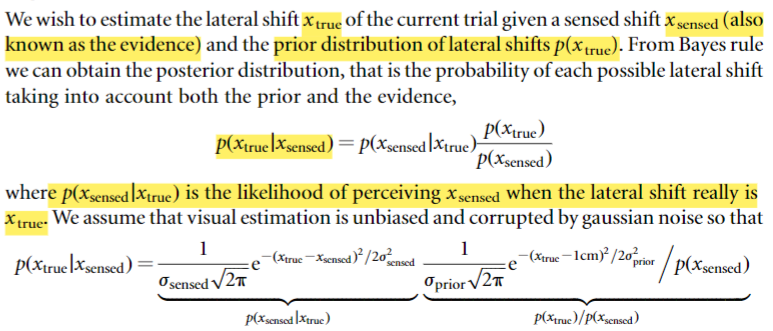

#### B) In the case you use a Bayesian strategy, compute the shift estimation for a true shift of 1.5 cm with feedback associated with a variance of 0.1 cm. With this shift estimate, what will be the deviation from target at the end of the movement (considering that the execution of the movement perfectly reflects the position that the subject aims)?

Prior distribution: gaussian with mean 1 and dp 0.5 cm -> p(true)
Do exercício anterior temos a likelihood


#### C) How will evolve this error (deviation from target) for different shifts? Sketch a graph and describe it qualitatively.

 If subjects combine the prior and the evidence provided by sensory feedback (model 2), the estimated lateral shift should move towards the mean of the prior by an amount that depends on the sensory uncertainty. For a gaussian distribution of sensory uncertainty, this predicts a linear relationship between lateral deviation and the true lateral shift, which should intercept the abscissa at the mean of the prior (1 cm) and with a slope that increases with uncertainty.

#### D) How would this graph change if the variability of the feedback decreases/increases? Add two traces on the previous graph (corresponding to a more reliable feedback and a less reliable feedback).


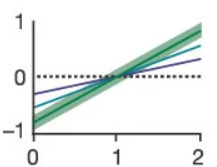

#### E) Build these theoretical graphs with the experimental data and discuss the results. Check that the theory applies to each condition and each subject.


In [ ]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f"Subject 1 - Lateral Deviation vs. Lateral Shift", fontsize=16)

# Define common x and y axis limits
x_limits = [0, 2]
y_limits = [-1, 1]

# Iterate through each condition
for condition in range(1, 5):
    # Get the rows of the dataset that correspond to the condition
    dataset_condition = datasets[0][datasets[0]['Condition'] == condition]

    # Extract DeviationTarget and LateralShift for the condition
    deviation_target = dataset_condition['DeviationTarget'].to_numpy()
    lateral_shift = dataset_condition['LateralShift'].to_numpy()

    # Calculate the best-fit line parameters (slope and intercept)
    slope, intercept = np.polyfit(lateral_shift, deviation_target, 1)

    # Create a range of x values for the line
    x_line = np.array([0, 2])
    y_line = slope * x_line + intercept

    # Plot DeviationTarget vs. LateralShift for the condition and the best-fit line
    row, col = divmod(condition - 1, 2)
    ax = axes[row, col]

    ax.scatter(lateral_shift, deviation_target, label=f"Condition {condition}", alpha=0.5)
    ax.plot(x_line, y_line, color='red', linestyle='--', label='Best-Fit Line')
    ax.set_xlabel('Lateral Shift [cm]')
    ax.set_ylabel('DeviationTarget [cm]')
    ax.set_title(f"Condition {condition}")
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.legend()

plt.show()

In [ ]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f"Subject 1 - Lateral Deviation vs. Lateral Shift", fontsize=16)

# Iterate through each condition
for condition in range(1, 5):
    # Get the rows of the dataset that correspond to the condition
    dataset_condition = datasets[5][datasets[5]['Condition'] == condition]

    # Extract Lateral Deviation and Lateral Shift for the condition
    lateral_deviation = dataset_condition['DeviationTarget'].to_numpy()
    lateral_shift = dataset_condition['LateralShift'].to_numpy()

    # Plot Lateral Deviation vs. Lateral Shift for the condition
    row, col = divmod(condition - 1, 2)
    ax = axes[row, col]

    ax.scatter(lateral_shift, lateral_deviation, label=f"Condition {condition}", alpha=0.5)
    ax.set_xlabel('Lateral Shift [cm]')
    ax.set_ylabel('Lateral Deviation [cm]')
    ax.set_title(f"Condition {condition}")
    ax.legend()

plt.show()


#### F) In comparison with a Bayesian strategy, the naïve strategy would consist in ignoring the prior and only use the feedback. How would evolve the error with this strategy? Which strategy is better? Why? 

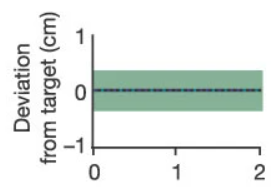

Tá no texto